## The Bootstrap

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
def g(x, mu, sigma): return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x - mu)**2/2/sigma**2)

### The Central Limit Theorem

se estimate: 0.182
se         : 0.1826


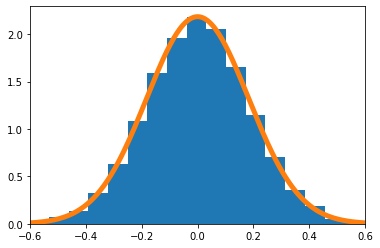

In [350]:
t = np.linspace(-0.6, 0.6, 200)
sample_means = []

for _ in range(10000):
    X = np.random.normal(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0, se), lw=5)
plt.xlim(-0.6, 0.6);

se estimate: 0.05312
         se: 0.0527


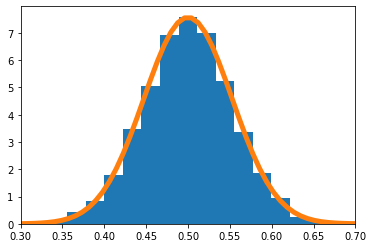

In [133]:
sample_means = []
t = np.linspace(0.3, 0.7)

for _ in range(10000):
    X = np.random.uniform(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(12*30)

print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 0.5))):.4}")
print(f"         se: {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0.5, se), lw=5)
plt.xlim(0.3, 0.7);

se estimate: 0.1835
se         : 0.1826


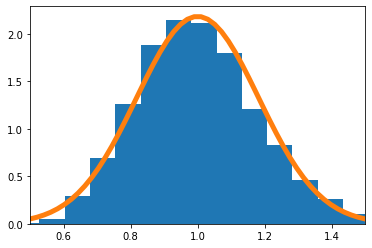

In [132]:
t = np.linspace(0.5, 1.5)
sample_means = []

for _ in range(10000):
    X = np.random.exponential(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = 1/np.sqrt(30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 1))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 1, se), lw=5)
plt.xlim(0.5, 1.5);

se estimate: 0.08977
se         : 0.08944


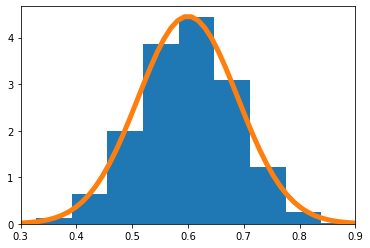

In [135]:
t = np.linspace(0.3, 0.9)
sample_means = []

for _ in range(100000):
    X = np.random.binomial(1, 0.6, size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)
se = np.sqrt(0.6*0.4/30)
    
print(f"se estimate: {np.sqrt(np.mean(np.square(sample_means - 0.6))):.4}")
print(f"se         : {se:.4}")

plt.hist(sample_means, bins=12, density=True);
plt.plot(t, g(t, 0.6, se), lw=5)
plt.xlim(0.3, 0.9);

Above, we estimated the standard error of the mean by repeatedly sampling from a **known population distribution** in order to generate a random sample from the **sampling distribution of the mean**. This approach can't work in practice because we don't know the population distribution! How do we estimate the standard error of the mean in the absence of this knowledge?

Approximate the population distribution as well as we can using only our data set.

Given data $D=\{x_1,\ldots,x_n\}$ drawn from an unknown distribution $P$, define the **empirical distribution of $D$** to be the discrete distribution over $D$ defined by

$$
\widehat P(x) = \frac{\#\{i : x_i=x\}}{n}.
$$

Let $X$ represent the result of a sequence of 100 flips of a coin, each flip having probability $p$ of coming up heads.

[0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1]
p-hat(0)=0.3667
p-hat(1)=0.6333


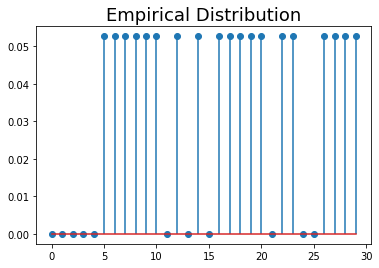

In [265]:
np.random.seed(666)
X = 1*(np.random.uniform(size=30) < 0.6)
print(X.astype(int))
print(f"p-hat(0)={np.sum(X == 0)/30:.4}\np-hat(1)={np.sum(X == 1)/30:.4}")
plt.stem(range(30), X/np.sum(X), use_line_collection=True);
plt.title("Empirical Distribution", fontsize=18);

We simulate the sampling from $P$ by sampling from $\widehat{P}$. A random sample of size $n$ drawn from $\widehat{P}$ is a sample drawn from $D$, **with replacement**.

In [278]:
b_means = []

for _ in range(100000):
#     I = np.random.randint(30, size=30)
    B = np.random.choice(X, size=30)
    b_means.append(B.mean())

print(f"Bootstrapped variance estimate = {np.var(b_means):.4}")
print(f"Variance of sampling distribution of the mean = {0.6*0.4/30:.4}")

Bootstrapped variance estimate = 0.007738
Variance of sampling distribution of the mean = 0.008


In [276]:
np.random.choice(X, size=30)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0])

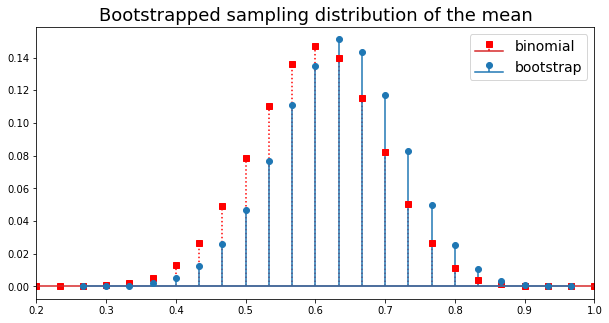

In [349]:
from scipy.special import binom
p = 0.6
n = 30
binom_dist = np.array([binom(30, k)*p**k*(1-p)**(n-k) for k in range(31)])

U = np.unique(b_means)
phat = [np.sum(b_means == u)/len(b_means) for u in U]
plt.figure(figsize=(10, 5))
plt.stem(np.arange(31)/30, binom_dist, 'r:', use_line_collection=True, markerfmt="sr", label="binomial")
plt.stem(U, phat, use_line_collection=True, basefmt='C0-', label="bootstrap")
plt.title(f"Bootstrapped sampling distribution of the mean", fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0.2, 1);

In [428]:
from sklearn.linear_model import LinearRegression
n = 1000
b0 = 1
b1 = -0.5

0.99958594669265 [-0.50224037]


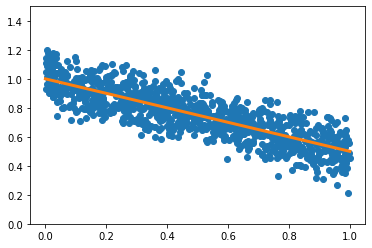

In [429]:
X = np.random.uniform(size=n)
e = np.random.normal(0, 0.1, size=n)
y = b0 + b1*X + e
plt.plot(X, y, 'o')
plt.plot([0, 1], [1, 0.5], lw=3)
plt.ylim(0, 1.5)

M = LinearRegression()
M.fit(X.reshape(-1, 1), y)
b0hat = M.intercept_
b1hat = M.coef_
print(b0hat, b1hat)

In [430]:
y_pr = M.predict(X.reshape(-1, 1))
RSS = np.sum(np.square(y - y_pr))
s_hat = np.sqrt(RSS/(n-2))
print(s_hat)

0.09736783099596594


In [431]:
Xbar = X.mean()
SXX = np.sum(np.square(X - Xbar))
se0 = s_hat*np.sqrt(1/n + Xbar/SXX)
se1 = s_hat/np.sqrt(SXX)
print(f"se(b0) = {se0:.4f}\nse(b1) = {se1:.4f}")

se(b0) = 0.0082
se(b1) = 0.0108


In [432]:
b0B = []
b1B = []

for _ in range(100000):
    I = np.random.choice(len(X), size=len(X))
    XB = X[I]
    yB = y[I]
    M = LinearRegression()
    M.fit(XB.reshape(-1, 1), yB)
    b0B.append(M.intercept_)
    b1B.append(M.coef_)
b0B = np.array(b0B)
b1B = np.array(b1B)

In [433]:
print(f"bootstrap se(b0) = {np.std(b0B):.4f}\nbootstrap se(b1) = {np.std(b1B):.4f}")


bootstrap se(b0) = 0.0062
bootstrap se(b1) = 0.0112
